## Задача: Выбрать непрерывное распределение случайной величины. Построить гистограмму выборки из этого распределения и нарисовать поверх гистограммы теоретическую плотность распределения выбранной случайной величины

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Сгенерируем выборку объёма N = 1000 из непрерывного распределения $\chi ^{2}$ $\href{https://ru.wikipedia.org/wiki/Распределение_хи-квадрат}{(хи-квадра́т)}$ с ${k}$ степеня́ми свобо́ды

In [2]:
N = 1000
k = 4
# объект распределени хи-квадрат с K степенями сводобы
chi2 = sts.chi2(k) 
# берём тысячу результатов выборки из объекта распределения
sample = chi2.rvs(size = N) 
# на всякий случай взглянем на получившиеся данные, первые 10 штук из тысячи к примеру
print(sample[:10])

[5.04863633 2.68077297 0.62935194 5.15533319 2.47272162 2.77195601
 7.28393659 4.660003   7.69793882 2.51042231]


Построим **гистограмму** нашей **выборки** и нарисуем поверх неё **теоретическую плотность распределения** 

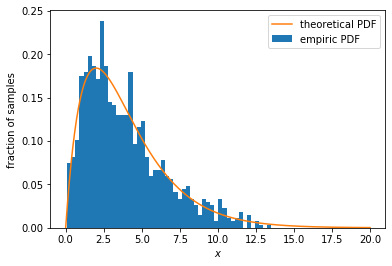

In [12]:
# метим оси
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# гистограмма выборки с карманами по 50 значений
plt.hist(sample, bins=50, density=True, label = 'empiric PDF')

# функция плотности вероятности распределения, взятая для 1000 точек в отрезке от 0 до 20
x = np.linspace(0,20,N)
cdf = sts.chi2.pdf(x, k)

# рисуем график получившейся функции
plt.plot(x, cdf, label='theoretical PDF')
plt.legend()

## Задача: Оценить распределение выборочного среднего распределения хи-квадрат при разных объёмах выборок. Приближается ли это распределение к нормальному?

Возьмём 5 выборочных значений из объекта распределения, закинем в список. Сделаем это тысячу раз :) тысяча списков, в каждом по 5 выборочных значений.
Сделаем то же для 10, 50, 100 выборочных значений

In [4]:
samples_5 = [chi2.rvs(size=5) for i in range(1000)]
samples_10 = [chi2.rvs(size=10) for i in range(1000)]
samples_50 = [chi2.rvs(size=50) for i in range(1000)]

Теперь для каждой группы {5,10,50} подсчитаем выборочное среднее у каждого из тысячи списков. 
Для каждой группы тогда получится список состоящий из 1000 выборочных средних.


In [5]:
from statistics import mean

samples_5_means = [mean(sample) for sample in samples_5]
samples_10_means = [mean(sample) for sample in samples_10]
samples_50_means = [mean(sample) for sample in samples_50]

А теперь будем строить гистограмму каждой из группы. 
Центральная предельная теорема говорит нам о том, что такая группа, состоящая из выборочных средних 
случайных выборок, будет приближаться к нормальному распределению. 

In [6]:
# мат.ожидание Теоретического распределения хи-квадрат равно k
# дисперсия Теоретического распределения хи-квадрат равно 2k
mean = k
variance = 2*k

Напишем функцию, которая будет рисовать гистограмму и график нормального распределения

In [23]:
def draw_hist_norm(samples_means, sample_size):
    
    # метим оси
    plt.ylabel('f(x)')
    plt.xlabel('$x$')
    
    # гистограмма выборочных средних
    plt.hist(samples_means, bins=50, density=True, label='empirical normalized sum distribution pdf')
    
    # объект нормального распределения с мат.ожиданием и дисперсией Теоретического распределения хи-квадрат  
    norm_rv = sts.norm(loc=mean, scale=(variance/sample_size)**0.5)
    
    # создаём объект функции плотности вероятности на 1000 точках в интервале от 0 до 20
    x = np.linspace(0,20,N)
    pdf = norm_rv.pdf(x)
    
    # строим график этой функции
    plt.plot(x, pdf, label='normal distribution pdf', alpha=0.5)
    plt.legend()

Используем функцию для 3 групп

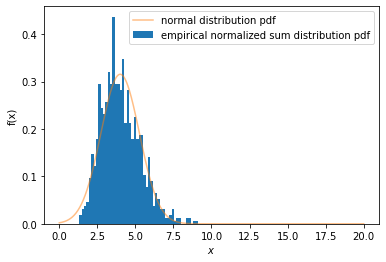

In [24]:
# гистограмма для группы из выборок размера 5 и рядом график нормального распределения.
draw_hist_norm(samples_5_means, 5)

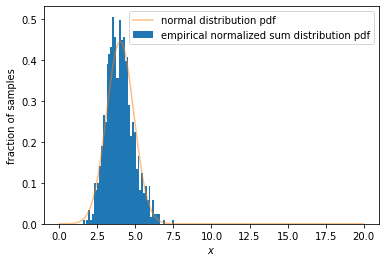

In [21]:
# гистограмма для группы из выборок размера 10 и рядом график нормального распределения.
draw_hist_norm(samples_10_means, 10)

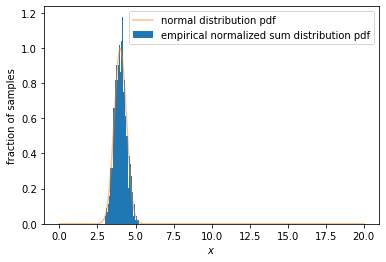

In [22]:
# гистограмма для группы из выборок размера 50 и рядом график нормального распределения.
draw_hist_norm(samples_50_means, 50)

## Задача: Описать разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

По графикам видно, что чем больше n (5,10,50,...), тем ближе распределение выборочных средних к нормальному распределению